<a href="https://colab.research.google.com/github/Ayan2109/NeuralNetwrok_RM/blob/main/NeuralNetworkFinalproject_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import pandas as pd 
import numpy as np


Reading csv file

In [2]:
df = pd.read_csv('https://cocl.us/concrete_data')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Checking if the data is clean 

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

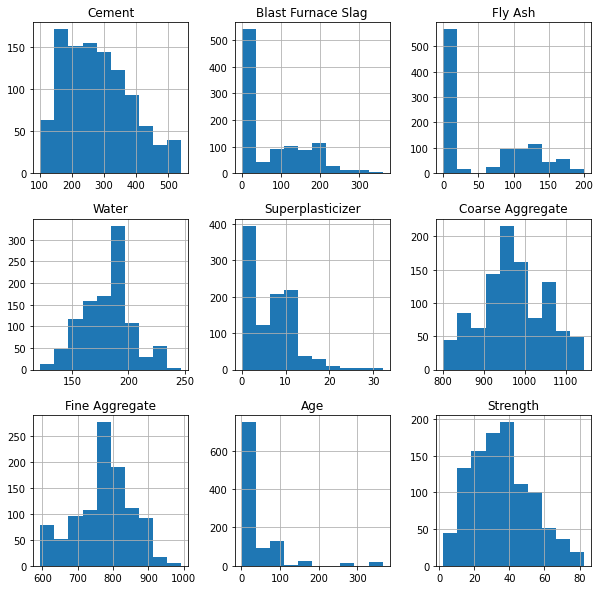

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
df.hist(figsize = (10,10))
plt.show()

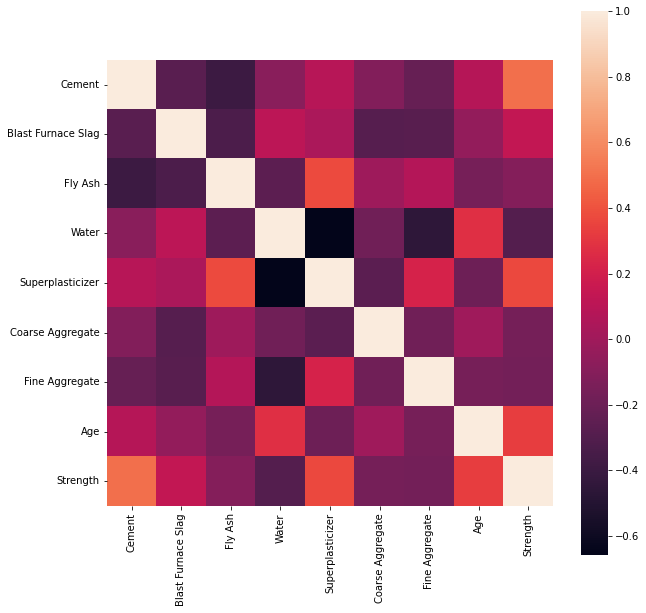

In [14]:
cmap = df.corr()
fig =  plt.figure(figsize=(10,10))
sns.heatmap(cmap, vmax = 1.0, square = True)
plt.show()

Dividing the data set into independent and dependent variables i.e X and Y

In [16]:
X = df[['Cement', 'Blast Furnace Slag','Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate','Fine Aggregate','Age']]
Y = df[['Strength']]
print(X.shape)
print(Y.shape)

(1030, 8)
(1030, 1)


In [17]:
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.model_selection import train_test_split

#splitting the data into 30% for testing and 70% for training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)

In [18]:
# Creating the regression model
def regression_model():
    model = Sequential()
    n_cols = X.shape[1]
    model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return model

In [19]:

from sklearn.metrics import mean_squared_error

# function to calculate mean squared error for the model 50 times and store it in a list
def training_model(X_train, X_test, Y_train, Y_test):
    list_mse = []
    
    
    for x in range(50):
        
        model = regression_model()
        model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = 50, verbose = 0)
        yhat = model.predict(X_test)
        list_mse.append(mean_squared_error(Y_test,yhat))
        
    return list_mse

In [20]:
#list of 50 mean squared errors from the iterations
list_of_mse = training_model(X_train, X_test, Y_train, Y_test)

In [21]:
#printing and caclulating the list, standard deviation for the list and the mean for the list
print('List of MSE: {}'.format(list_of_mse))
std_A = np.std(list_of_mse)
mean_A = np.mean(list_of_mse)
print('Standard Deviation: {0:.3f}'.format(std_A))
print('Mean: {0:.3f}'.format(mean_A))

List of MSE: [150.52227860486067, 90.72870665176993, 129.01583505828125, 118.2174499366528, 205.00314966917168, 134.4647623295145, 125.31723665838408, 124.46867089422894, 1679.355080051679, 188.53565807616172, 313.756651134974, 129.86582061939322, 95.94956141221189, 128.82184248371522, 694.3344825453283, 550.1785500193329, 101.19777473267035, 854.9495469259044, 180.06399586992495, 179.99135715710358, 3435.377514351819, 294.08485072297674, 232.29398695595845, 123.28038753489854, 257.71262975989634, 1276.6113552859988, 222.2153272905247, 882.7057116444821, 126.05891450327981, 228.66706791108592, 602.0475749332536, 142.99990409295384, 317.63570562154916, 252.73991031721377, 149.40871988887125, 128.4907165441779, 564.558277495756, 90.26364733534484, 137.1702979132623, 129.54990096717765, 123.56783206731241, 216.87155585647307, 142.68337449078575, 125.50049989976445, 817.206051753138, 182.35807697592153, 243.7179020695652, 142.48164421320578, 382.46024815113805, 122.33089727512166]
Standard

Part B: Using Normalized Data 

In [22]:
# Normalizing the data using preprocesssing from sklean
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

#train test split for normalized data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)


In [23]:
#calling the function to store the list of mean squared errors
list_of_mse_normalizeddata = training_model(X_train, X_test, Y_train, Y_test)

In [24]:
#printing and caclulating the list, standard deviation for the list and the mean for the list of Part B
print('List of MSE for Normalized Data {}:'.format(list_of_mse_normalizeddata))
std_B = np.std(list_of_mse_normalizeddata)
mean_B = np.mean(list_of_mse_normalizeddata)
print('Standard Deviation for Normalized Data {0:.3f}:'.format(std_B))
print('Mean for Normalized Data: {0:.3f}'.format(mean_B))

List of MSE for Normalized Data [298.58408014183027, 554.138369169976, 347.2605910315829, 347.0130576723024, 370.1497030939185, 402.2875091307969, 364.2721254050654, 245.95900692834167, 349.5564760237317, 272.6228566787481, 259.3105236956968, 379.49332345566347, 346.3556109738023, 315.66927621880075, 285.2112197363795, 304.3544396848526, 472.4093129741959, 372.16392158643293, 383.5579692193621, 318.27042356108325, 439.0464363712002, 291.00611933933936, 503.25549163915497, 398.96409596062364, 576.7866334326534, 624.9756028233519, 496.0753255844132, 359.07525802077646, 326.42448921046423, 487.69523915690337, 375.71616778232874, 347.1499768721411, 285.7520687935825, 318.8643921547645, 395.0697095907349, 287.61184931190945, 314.3634698416775, 274.3981169623685, 377.3675395230728, 300.8477087513861, 358.4918672752675, 277.17106496454574, 337.4317582900105, 392.11995120287366, 463.03661369019875, 294.2425465405531, 274.8132039377306, 404.8542664970275, 435.53582473930265, 446.06086191849244]

In [25]:
print('Mean for part A:{0:.3f}'.format(mean_A))
print('Mean of Part B: {0:.3f}'.format(mean_B))

Mean for part A:365.356
Mean of Part B: 369.057


In [26]:
# comparing the mean for Part B and Part A
print('Mean of Part B is {0:.3f} more than Part A'.format(mean_B-mean_A))

Mean of Part B is 3.701 more than Part A


PART C: using 100 Epochs to build Training model 

In [27]:
# list to store mean squared errors for part C
list_of_mse_Part_C =[]

#Calculating 50 mean squared errors but with epoch set at 100
for x in range(50):
    model = regression_model()
    model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = 100, verbose = 0)
    yhatC = model.predict(X_test)
    list_of_mse_Part_C.append(mean_squared_error(Y_test,yhatC))
                              


In [28]:
#printing and caclulating the list, standard deviation for the list and the mean for the list of Part C

print('List of MSE: {}'.format(list_of_mse_Part_C))
std_C = np.std(list_of_mse_Part_C)
mean_C = np.mean(list_of_mse_Part_C)
print('Standard Deviation: {0:.3f}'.format(std_C))
print('Mean: {0:.3f}'.format(mean_C))

List of MSE: [169.34559227863477, 160.2994528840621, 192.47026972869415, 172.81907749676546, 187.51653646739084, 171.26044301479178, 165.59864498044092, 167.40534484657383, 184.14073123340057, 186.09598049409007, 193.2259627392903, 182.49726719264513, 172.93632960913172, 178.586847124539, 167.49281912843213, 199.0716275942819, 171.58434216792216, 179.0909022955886, 182.28020174347157, 202.52355408712444, 186.57760136276542, 178.60412213074218, 171.19081025745342, 169.74837204406705, 178.23313751478673, 154.24511640329007, 162.28196762532775, 167.02140900779403, 164.09766674665138, 184.15986962560356, 175.08461723258284, 174.87273027219928, 174.62242419439838, 174.07030471726148, 184.2134731322933, 190.2871980130914, 168.50172792720963, 172.12399858542062, 180.73537655178575, 171.18870903116678, 176.4674210717913, 186.1279847221721, 170.59956522438276, 195.45448197984533, 189.41586763886778, 171.38141174260045, 176.60852232194839, 219.66915662299593, 194.5294281192213, 165.3809224280201

In [29]:
print('Mean for Part B: {0:.3f}'.format(mean_B))
print('Mean for Part C: {0:.3f}'.format(mean_C))

Mean for Part B: 369.057
Mean for Part C: 178.275


In [30]:
# Comparing Mean for Part C and Part B
print('Mean for Part C is {0:.3f} less than Part B'.format(mean_B - mean_C))

Mean for Part C is 190.782 less than Part B


PART D: Increasing the Number of Hidden layers

In [31]:
#creating the new regresssion model with 3 hidden layers
def new_regression_model():
    
    model = Sequential()
    n_cols = X.shape[1]
    # 3 hidden layers
    model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    return model
    

In [32]:
# list to input the mean squared error
list_of_mse_Part_D =[]

#calculating mean squared error 50 times
for x in range(50):
    model = new_regression_model()
    model.fit(X_train,Y_train, validation_data=(X_test, Y_test), epochs = 50, verbose = 0)
    yhatD = model.predict(X_test)
    list_of_mse_Part_D.append(mean_squared_error(Y_test,yhatD))
    


In [33]:
#printing and caclulating the list, standard deviation for the list and the mean for the list of Part D

print('List of MSE: {}'.format(list_of_mse_Part_D))
std_D = np.std(list_of_mse_Part_D)
mean_D = np.mean(list_of_mse_Part_D)
print('Standard Deviation: {0:.3f}'.format(std_D))
print('Mean: {0:.3f}'.format(mean_D))

List of MSE: [128.9418800151382, 138.93913722495213, 149.11719719085957, 149.17240969927283, 155.3814761432772, 146.51064885722636, 143.34198634056335, 145.5133907670219, 110.89473195908934, 126.91259932531135, 144.55541149122004, 134.99623590044433, 111.50956370929225, 150.71947162137312, 152.2444868942966, 149.36099552591944, 135.04935249302014, 134.9659728535405, 126.78201242190588, 146.64175775594734, 135.32244408237116, 154.97481067177182, 139.77087341810412, 129.3541648571109, 146.41809735024245, 145.8147257371402, 142.67901922531018, 116.58635918615668, 140.4926429048991, 137.07845823549036, 151.58590256007773, 144.86181053633257, 150.7273974778145, 141.40963402518324, 149.48683429577446, 131.68127607162276, 137.37367694622907, 148.42210228146868, 145.45650498537782, 1444.6517097247101, 148.23050743514887, 147.65530396382417, 135.75274727648687, 130.2414402377214, 100.62905264344191, 137.67133119140573, 145.02514339500422, 150.55906690586858, 149.96051361687657, 142.787141512639

In [34]:
print('Mean for Part B: {0:.3f}'.format(mean_B))
print('Mean for Part D: {0:.3f}'.format(mean_D))

Mean for Part B: 369.057
Mean for Part D: 166.084


In [35]:
# Comparing Mean for Part D and Part B

print('Mean for Part D is {0:.3f} less than Part B'.format(mean_B - mean_D))

Mean for Part D is 202.973 less than Part B
